In [2]:
import pandas as pd
import netCDF4 as nc

# Define the base date
base_date = pd.Timestamp('1900-01-01')

# Path to your NetCDF file
file_path = r'F:\Ph.D\Project_Landfill_fires\Data\2024\Ghazipur\adaptor.mars.internal-1722159567.6442325-8105-14-df2c97e5-47f3-4ae4-8260-0656baffa873.nc'
dataset = nc.Dataset(file_path)
# print(dataset.variables)
# Read the time variable
num_dates = dataset.variables['time'][:]  # Adjust 'time' to the actual variable name in your nc file
blh = dataset.variables['blh'][:]  # Adjust 'time' to the actual variable name in your nc file

# print(blh)
# Inspect the range of numeric dates
min_date = num_dates.min()
max_date = num_dates.max()
print(f"Minimum numeric date: {min_date}")
print(f"Maximum numeric date: {max_date}")

# Check the units of the time variable
time_units = dataset.variables['time'].units
print(f"Time units: {time_units}")

# Convert numeric dates to actual dates based on the units (hours since base date)
actual_dates = [base_date + pd.Timedelta(hours=int(hour)) for hour in num_dates]

# # Print the actual dates
# for date in actual_dates:
#     print(date)


Minimum numeric date: 1088400
Maximum numeric date: 1090607
Time units: hours since 1900-01-01 00:00:00.0


In [16]:
# print(dataset.variables)
lon=dataset.variables['longitude'][:]
lat=dataset.variables['latitude'][:]
actual_dates = [base_date + pd.Timedelta(hours=int(hour)) for hour in num_dates]
blh = dataset.variables['blh'][:]  # Adjust 'time' to the actual variable name in your nc file


[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-03-01 01:00:00'), Timestamp('2024-03-01 02:00:00'), Timestamp('2024-03-01 03:00:00'), Timestamp('2024-03-01 04:00:00'), Timestamp('2024-03-01 05:00:00'), Timestamp('2024-03-01 06:00:00'), Timestamp('2024-03-01 07:00:00'), Timestamp('2024-03-01 08:00:00'), Timestamp('2024-03-01 09:00:00'), Timestamp('2024-03-01 10:00:00'), Timestamp('2024-03-01 11:00:00'), Timestamp('2024-03-01 12:00:00'), Timestamp('2024-03-01 13:00:00'), Timestamp('2024-03-01 14:00:00'), Timestamp('2024-03-01 15:00:00'), Timestamp('2024-03-01 16:00:00'), Timestamp('2024-03-01 17:00:00'), Timestamp('2024-03-01 18:00:00'), Timestamp('2024-03-01 19:00:00'), Timestamp('2024-03-01 20:00:00'), Timestamp('2024-03-01 21:00:00'), Timestamp('2024-03-01 22:00:00'), Timestamp('2024-03-01 23:00:00'), Timestamp('2024-03-02 00:00:00'), Timestamp('2024-03-02 01:00:00'), Timestamp('2024-03-02 02:00:00'), Timestamp('2024-03-02 03:00:00'), Timestamp('2024-03-02 04:00:00'), Timestamp('20

In [3]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the base date
base_date = pd.Timestamp('1900-01-01')

# Path to your NetCDF file
file_path = r'F:\Ph.D\Project_Landfill_fires\Data\2024\Ghazipur\adaptor.mars.internal-1722159567.6442325-8105-14-df2c97e5-47f3-4ae4-8260-0656baffa873.nc'
dataset = nc.Dataset(file_path)

# Read the time, latitude, longitude, and blh variables
num_dates = dataset.variables['time'][:]
lon = dataset.variables['longitude'][:]
lat = dataset.variables['latitude'][:]
blh = dataset.variables['blh'][:]  # Adjust 'blh' to the actual variable name in your nc file

# Convert numeric dates to actual dates based on the units (hours since base date)
actual_dates = [base_date + pd.Timedelta(hours=int(hour)) for hour in num_dates]

# Get the BLH data for the first hour
blh_first_hour = blh[0, :, :]

# Create a plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the BLH data
plt.contourf(lon, lat, blh_first_hour, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Boundary Layer Height (BLH)')

# Set the title
plt.title(f'BLH for {actual_dates[0]}')

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'cartopy'

Shape of BLH data: (2208, 2, 1, 1)


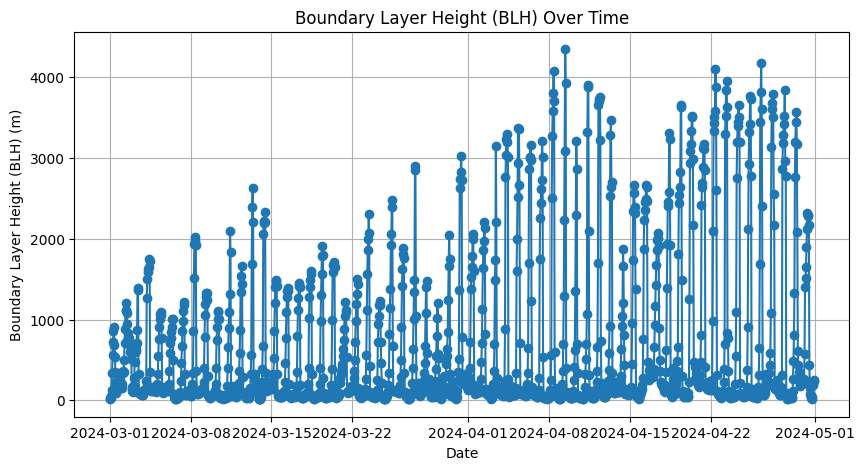

In [15]:
import pandas as pd
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Define the base date
base_date = pd.Timestamp('1900-01-01')

# Path to your NetCDF file
file_path = r'F:\Ph.D\Project_Landfill_fires\Data\2024\Ghazipur\adaptor.mars.internal-1722159567.6442325-8105-14-df2c97e5-47f3-4ae4-8260-0656baffa873.nc'
dataset = nc.Dataset(file_path)

# Read the time variable
num_dates = dataset.variables['time'][:]
blh = dataset.variables['blh'][:]

# Print the shape of the BLH data
print(f"Shape of BLH data: {blh.shape}")

# Convert numeric dates to actual dates based on the units (hours since base date)
actual_dates = [base_date + pd.Timedelta(hours=int(hour)) for hour in num_dates]

# If BLH data has dimensions [time, level], reshape it accordingly
if blh.ndim == 4:
    # Assuming the shape is [time, depth, lat, lon] and lat/lon have only one value
    blh_flat = blh[:, 0, 0, 0]  # Select the first depth level
else:
    raise ValueError(f"Unexpected number of dimensions in BLH data: {blh.ndim}")

# Verify dimensions match after reshaping
assert len(actual_dates) == len(blh_flat), "Mismatch between dates and BLH data lengths"

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(actual_dates, blh_flat, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Boundary Layer Height (BLH) (m)')
plt.title('Boundary Layer Height (BLH) Over Time')
plt.grid(True)
plt.show()


In [22]:
pip install netCDF4 numpy matplotlib geopandas shapefile


ERROR: Could not find a version that satisfies the requirement shapefile (from versions: none)
ERROR: No matching distribution found for shapefile

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


TypeError: Dimensions of C (5, 2) should be one smaller than X(13) and Y(5) while using shading='flat' see help(pcolor)

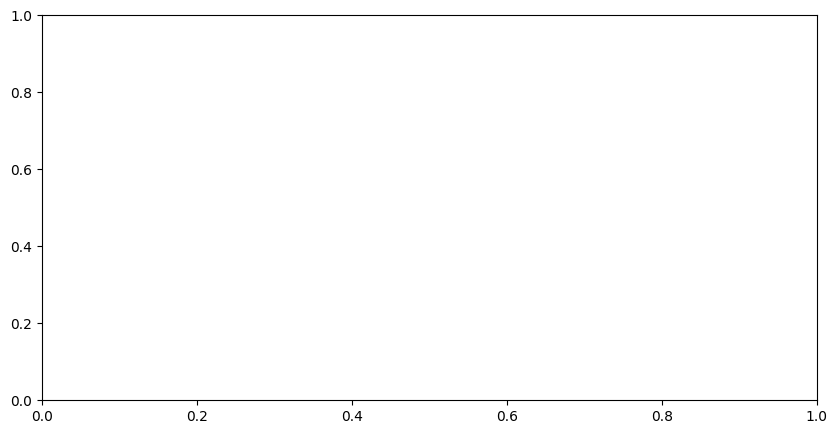

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Define the path to your NetCDF file and shapefile
nc_file_path = r'F:\Ph.D\Project_Landfill_fires\Data\2024\Ghazipur\adaptor.mars.internal-1722173132.7202752-29675-6-75d58876-17ca-4df8-97b3-38b1b131e50c.nc'
shapefile_path = r'F:\Ph.D\Project_Landfill_fires\Data\2024\Ghazipur\India_Shape\india_st.shx'

# Read the NetCDF file
dataset = nc.Dataset(nc_file_path)
time = dataset.variables['time'][:]
blh = dataset.variables['blh'][:]
lon = dataset.variables['longitude'][:]
lat = dataset.variables['latitude'][:]

# Define the base date
base_date = np.datetime64('1900-01-01T00:00:00')

# Convert numeric dates to actual dates based on the units (hours since base date)
actual_dates = base_date + np.array(time, dtype='timedelta64[h]')

# Select a specific time step (e.g., the first one)
time_step = 1
expver_index = 0  # Selecting the first index for expver

# Extract the BLH data for the specific time step and first expver level
blh_selected = blh[expver_index, :, :, time_step]

# Create the plot
plt.figure(figsize=(10, 5))

# Create a meshgrid for the longitude and latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

mymap = plt.pcolor(lon_grid, lat_grid, blh_selected.T, shading='auto', cmap='jet')
plt.colorbar(mymap, label='BLH (m)')
plt.title(f'Boundary Layer Height (BLH) for {np.datetime_as_string(actual_dates[time_step], unit="h")}')

# Load and plot the shapefile
shapefile = gpd.read_file(shapefile_path)
shapefile.boundary.plot(ax=plt.gca(), edgecolor='k')

# Additional plot settings
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Read the NetCDF file for wind data
u10 = dataset.variables['u10'][:]
v10 = dataset.variables['v10'][:]

# Define the specific location
target_lat = 28.62537167346769
target_lon = 77.32814453048788

# Find the nearest grid points
lat_idx = np.abs(lat - target_lat).argmin()
lon_idx = np.abs(lon - target_lon).argmin()

# Select the expver level (1)
expver_idx = 0

# Extract u10 and v10 values for the nearest grid points and expver = 1
u10_near = u10[lon_idx, lat_idx, expver_idx, :]
v10_near = v10[lon_idx, lat_idx, expver_idx, :]

# Calculate the average values for each hour (since only one point, average is the value itself)
u10_avg = u10_near  # no need to average since it's a single point
v10_avg = v10_near  # no need to average since it's a single point
blh_near = blh[lon_idx, lat_idx, expver_idx, :]

wind_speed = np.sqrt(u10_near**2 + v10_near**2)
wind_direction = np.mod(np.degrees(np.arctan2(u10_near, v10_near)) + 180, 360)
vc = blh_near * wind_speed

# Display the results with the corresponding dates
for i in range(len(actual_dates)):
    print(f'Date: {np.datetime_as_string(actual_dates[i], unit="h")}, Average u10: {u10_avg[i]:.2f}, Average v10: {v10_avg[i]:.2f}')

# Define the path to your Excel file
data_path = r'F:\Ph.D\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the data from the specified sheet (sheet index 1) as a table
data_table = pd.read_excel(data_path, sheet_name=0)

# Display the first few rows of the table to verify the contents
print(data_table.head())

# Extract 'From Date' and 'To Date' columns as cell arrays
from_date_col = data_table['PrescribedStandards']
to_date_col = data_table['Var2']

# Convert 'From Date' and 'To Date' columns to datetime format
from_dates = pd.to_datetime(from_date_col, format='%d-%m-%Y %H:%M')
to_dates = pd.to_datetime(to_date_col, format='%d-%m-%Y %H:%M')

# Match the dates between Excel and NetCDF
matching_indices = actual_dates.isin(from_dates)

# Display matching dates and their indices
print('Matching Dates:')
print(actual_dates[matching_indices])
print('Indices of Matching Dates:')
print(np.where(matching_indices)[0])
